In [1]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.impute import KNNImputer

import pickle
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)


### Read data

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [4]:
df.shape

(76529, 11)

In [5]:
df.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [6]:
df.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

### Preprocessing

In [7]:
#extract day,month,year,time from timestamp column.So,convert it to datetime
df.transaction_initiation=pd.to_datetime(df.transaction_initiation)

In [8]:
df['year'] = df['transaction_initiation'].dt.year
df['Month'] = df['transaction_initiation'].dt.month
df['Day'] = df['transaction_initiation'].dt.day
df['hour'] = df['transaction_initiation'].dt.hour
df['dayofweek'] = df['transaction_initiation'].dt.dayofweek

In [9]:
#drop unwanted columns
df.drop('transaction_initiation',axis=1,inplace=True) #we have extracted columns
df.drop('country',axis=1,inplace=True)    #only one unique value
df.drop('transaction_number',axis=1,inplace=True) 
df.drop('user_id',axis=1,inplace=True) #id is of no use

In [10]:
df.head()

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,year,Month,Day,hour,dayofweek
0,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,2016,11,15,19,1
1,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,11,9,2
2,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,7,7,2
3,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,11,16,2
4,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,16,17,2


In [11]:
print(df.dtypes)
print(df.nunique())

payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
Month                         int64
Day                           int64
hour                          int64
dayofweek                     int64
dtype: object
payment_method                 6
partner_id                    23
partner_category               9
device_type                    4
money_transacted            1454
partner_pricing_category       4
is_fraud                       2
year                           2
Month                          4
Day                           31
hour                          24
dayofweek                      7
dtype: int64


In [12]:
# sns.pairplot(df)

In [13]:
con_list=[cname for cname in df.columns if df[cname].nunique()<=31]
df[con_list]=df[con_list].astype('category')

In [14]:
df.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
year                        category
Month                       category
Day                         category
hour                        category
dayofweek                   category
dtype: object

In [15]:
df.is_fraud.value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

### Exploratory Data Analysis

In [16]:
def barplot(x,y,df):
    bar_plot1 = sns.countplot(x=x, data=df,hue=y)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 1, height)

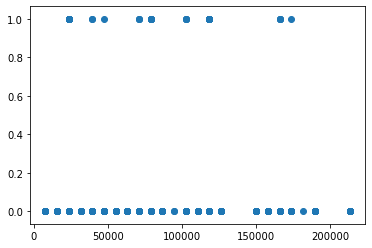

In [17]:
plt.scatter(df['partner_id'],df['is_fraud'])

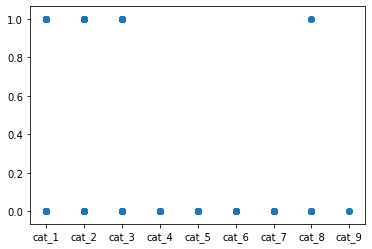

In [18]:
plt.scatter(df['partner_category'],df['is_fraud'])

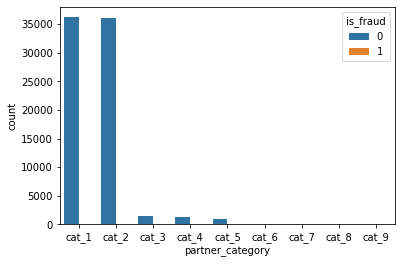

In [19]:
sns.countplot(x='partner_category',hue='is_fraud',data=df)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


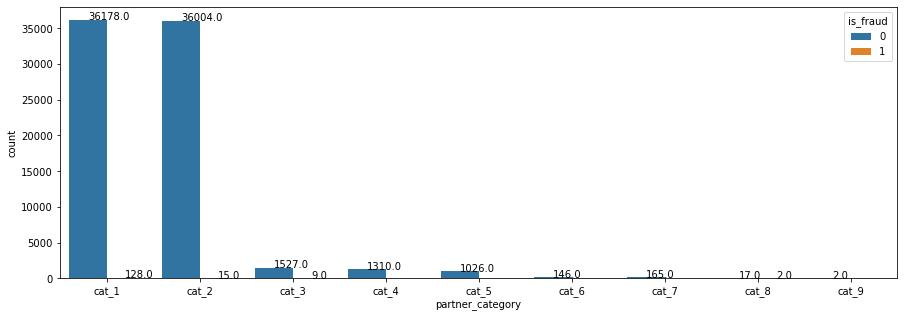

In [18]:
plt.figure(figsize=(15,5))
barplot('partner_category','is_fraud',df)


* __only cat1,cat2,cat3 and cat8 has fraud transaction.__
* __when partner_category lies in these categories review the transaction__ 

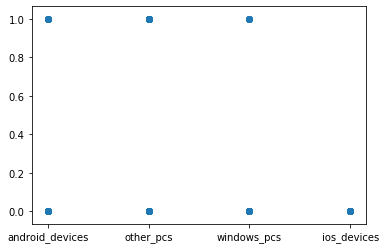

In [19]:
plt.scatter(df['device_type'],df['is_fraud'])

posx and posy should be finite values
posx and posy should be finite values


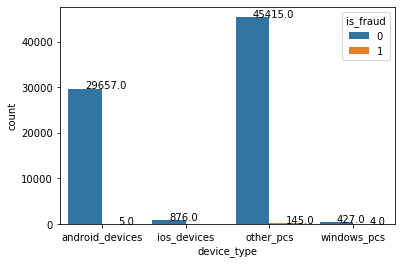

In [20]:
barplot('device_type','is_fraud',df)

* __android_devices,windows and other pcs has fraud transaction__
* __review once when transaction is done on these devices__

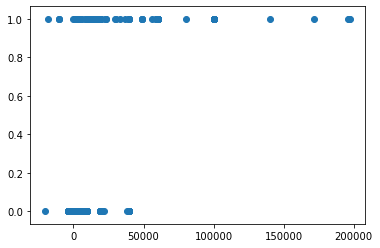

In [21]:
plt.scatter(df['money_transacted'],df['is_fraud'])

* __when the transaction amount is greater than 50000 there are high chances of fraud__
* __when amount transacted greater than 50000 review transaction__

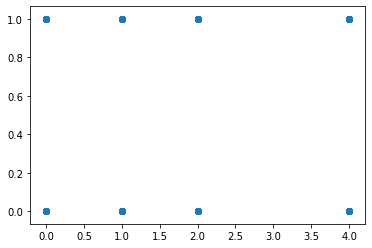

In [22]:
plt.scatter(df['partner_pricing_category'],df['is_fraud'])

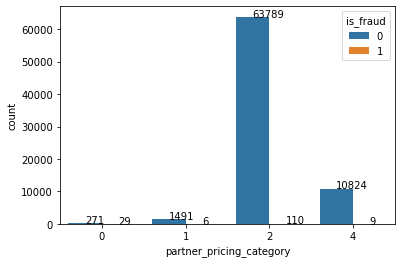

In [23]:
barplot('partner_pricing_category','is_fraud',df)

* __there are more fraud cases in category0 and cat2__
* __when transaction is of these pricing category review once__

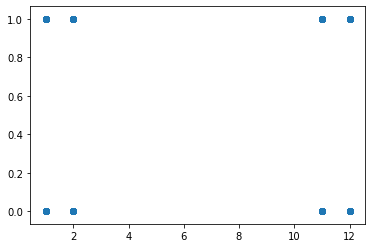

In [24]:
plt.scatter(df['Month'],df['is_fraud'])

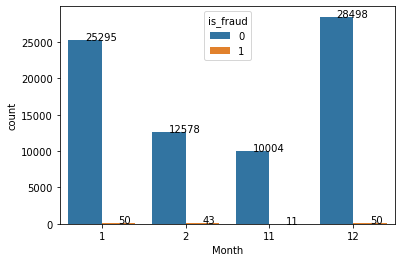

In [25]:
barplot('Month','is_fraud',df)

* __there are frauds only in jan,feb,oct and december__
* __review more when transacted in those months__

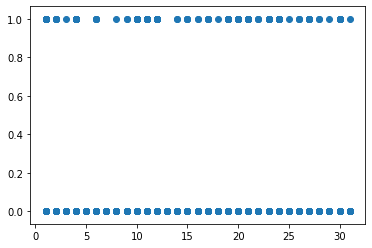

In [26]:
plt.scatter(df['Day'],df['is_fraud'])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


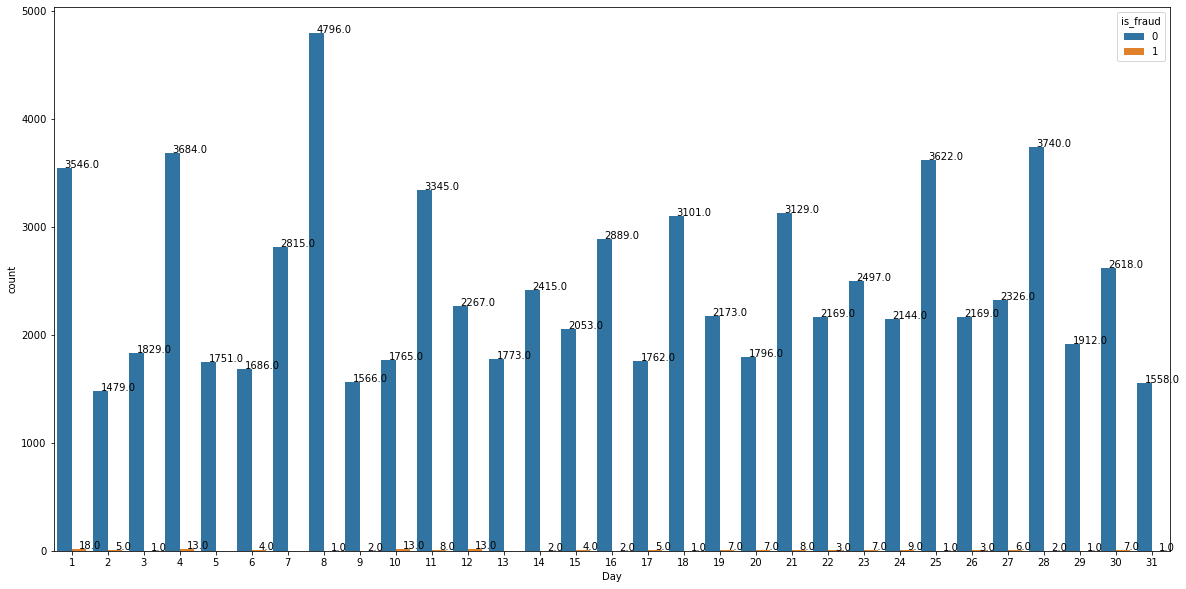

In [27]:
plt.figure(figsize=(20,10))
barplot('Day','is_fraud',df)

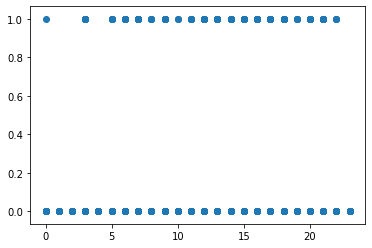

In [28]:
plt.scatter(df['hour'],df['is_fraud'])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


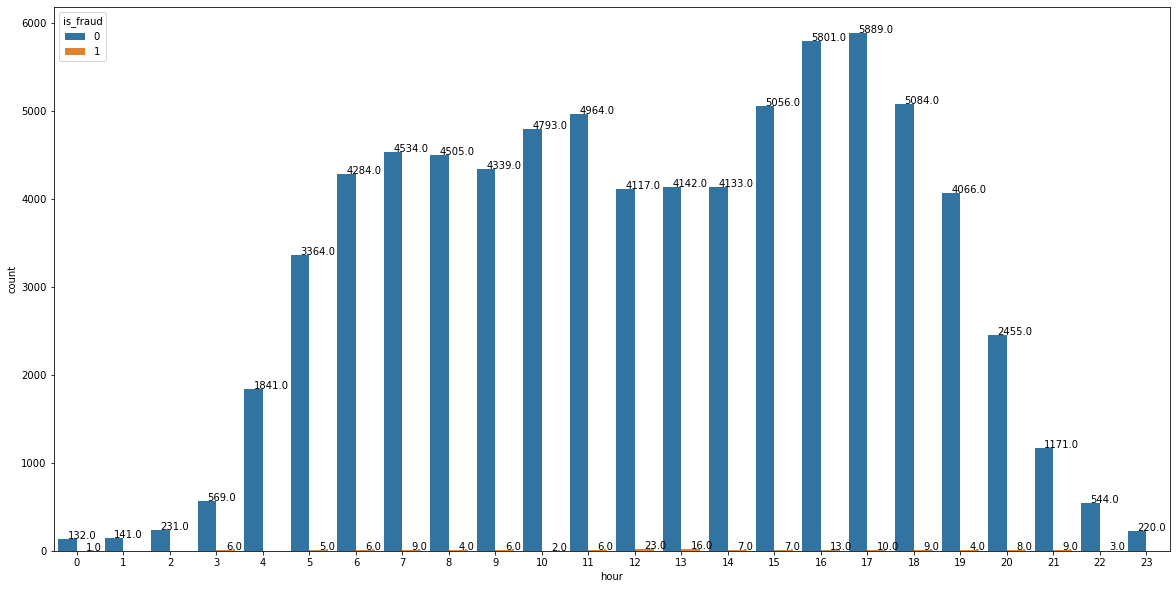

In [29]:
plt.figure(figsize=(20,10))
barplot('hour','is_fraud',df)

* __transaction done in afternoon between 12 to 18 has high chances of fraud__
* __review transaction done in these time range__

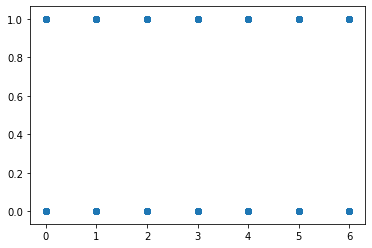

In [30]:
plt.scatter(df['dayofweek'],df['is_fraud'])

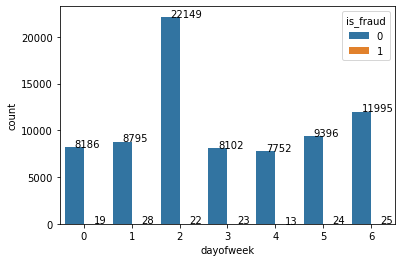

In [31]:
barplot('dayofweek','is_fraud',df)

* __in general double the daily transaction are done on wednesday__

### Splitting the data into train and validation

In [32]:
y=df['is_fraud']
X=df.drop('is_fraud',axis=1)

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=1250,stratify=y)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(51274, 11)
(25255, 11)
(51274,)
(25255,)


In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51274 entries, 43596 to 17236
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_method            51274 non-null  category
 1   partner_id                51274 non-null  category
 2   partner_category          51274 non-null  category
 3   device_type               51274 non-null  category
 4   money_transacted          51274 non-null  float64 
 5   partner_pricing_category  51274 non-null  category
 6   year                      51274 non-null  category
 7   Month                     51274 non-null  category
 8   Day                       51274 non-null  category
 9   hour                      51274 non-null  category
 10  dayofweek                 51274 non-null  category
dtypes: category(10), float64(1)
memory usage: 1.3 MB


In [35]:
num_cols = X_train.select_dtypes(exclude='category').columns
print(len(num_cols))

cat_cols=X_train.select_dtypes(include='category').columns
print(len(cat_cols))

1
10


### Scaling numeric columns

In [36]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_valid_num = pd.DataFrame(scaler.transform(X_valid[num_cols]), columns=num_cols)

### OneHotEncode categorical columns

In [37]:
ohe=OneHotEncoder(drop='first')
ohe.fit(X_train[cat_cols])
columns_ohe = list(ohe.get_feature_names(cat_cols))

In [38]:
X_train_cat=ohe.transform(X_train[cat_cols])
X_valid_cat=ohe.transform(X_valid[cat_cols])
print(X_train_cat.shape)
print(X_valid_cat.shape)

(51274, 104)
(25255, 104)


In [39]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_valid_cat = pd.DataFrame(X_valid_cat.todense(), columns=columns_ohe)
print(X_train_cat.shape)
print(X_valid_cat.shape)

(51274, 104)
(25255, 104)


### concatinate num and cat cols

In [40]:
X_train=pd.concat([X_train_num,X_train_cat],axis=1)
X_valid=pd.concat([X_valid_num,X_valid_cat],axis=1)
print(X_train.shape)
print(X_valid.shape)

(51274, 105)
(25255, 105)


### Defining error metrics

In [41]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Valid_Accuracy','Valid_Recall','Valid_Precision','Valid_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [42]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

### Logistic Regression

In [43]:
lr =LogisticRegression()
lr.fit(X_train, y_train)

y_pred_train =lr.predict(X_train)
y_pred_valid = lr.predict(X_valid)

classifcation_report_train_test(y_train,y_pred_train,y_valid,y_pred_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9986    0.9997    0.9991     51171
           1     0.6667    0.2913    0.4054       103

    accuracy                         0.9983     51274
   macro avg     0.8326    0.6455    0.7023     51274
weighted avg     0.9979    0.9983    0.9979     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9988    0.9995    0.9991     25204
           1     0.6061    0.3922    0.4762        51

    accuracy                         0.9983     25255
   macro avg     0.8024    0.6958    0.7377     25255
weighted avg     0.9980    0.9983    0.9981     25255



In [44]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,"LogisticRegression",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Valid_Accuracy,Valid_Recall,Valid_Precision,Valid_F1_Score
0,LogisticRegression,0.998284,0.998284,0.997908,0.997948,0.998258,0.998258,0.997978,0.998071


### Decision trees

In [45]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_valid = clf_dt.predict(X_valid)

classifcation_report_train_test(y_train,y_pred_train,y_valid,y_pred_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     51171
           1     1.0000    0.7961    0.8865       103

    accuracy                         0.9996     51274
   macro avg     0.9998    0.8981    0.9431     51274
weighted avg     0.9996    0.9996    0.9996     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     25204
           1     0.9333    0.8235    0.8750        51

    accuracy                         0.9995     25255
   macro avg     0.9665    0.9117    0.9374     25255
weighted avg     0.9995    0.9995    0.9995     25255



In [46]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,"DecisionTrees",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Valid_Accuracy,Valid_Recall,Valid_Precision,Valid_F1_Score
0,LogisticRegression,0.998284,0.998284,0.997908,0.997948,0.998258,0.998258,0.997978,0.998071
1,DecisionTrees,0.999590,0.999590,0.999591,0.999567,0.999525,0.999525,0.999509,0.999510


### RandomForest

In [47]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X=X_train, y=y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_valid = clf_rf.predict(X_valid)

classifcation_report_train_test(y_train,y_pred_train,y_valid,y_pred_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     51171
           1     1.0000    0.9806    0.9902       103

    accuracy                         1.0000     51274
   macro avg     1.0000    0.9903    0.9951     51274
weighted avg     1.0000    1.0000    1.0000     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9994    0.9997    0.9996     25204
           1     0.8409    0.7255    0.7789        51

    accuracy                         0.9992     25255
   macro avg     0.9202    0.8626    0.8893     25255
weighted avg     0.9991    0.9992    0.9991     25255



In [48]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Valid_Accuracy,Valid_Recall,Valid_Precision,Valid_F1_Score
0,LogisticRegression,0.998284,0.998284,0.997908,0.997948,0.998258,0.998258,0.997978,0.998071
1,DecisionTrees,0.999590,0.999590,0.999591,0.999567,0.999525,0.999525,0.999509,0.999510
2,RandomForest,0.999961,0.999961,0.999961,0.999961,0.999168,0.999168,0.999125,0.999138


### XGBoost

In [49]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1)
XGB_model.fit(X_train, y_train)

[19:03:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_train = XGB_model.predict(X_train)
y_pred_valid = XGB_model.predict(X_valid)

In [51]:
classifcation_report_train_test(y_train,y_pred_train,y_valid,y_pred_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999     51171
           1     0.9898    0.9417    0.9652       103

    accuracy                         0.9999     51274
   macro avg     0.9948    0.9709    0.9826     51274
weighted avg     0.9999    0.9999    0.9999     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9997     25204
           1     0.8167    0.9608    0.8829        51

    accuracy                         0.9995     25255
   macro avg     0.9083    0.9802    0.9413     25255
weighted avg     0.9996    0.9995    0.9995     25255



In [52]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,"XGBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Valid_Accuracy,Valid_Recall,Valid_Precision,Valid_F1_Score
0,LogisticRegression,0.998284,0.998284,0.997908,0.997948,0.998258,0.998258,0.997978,0.998071
1,DecisionTrees,0.999590,0.999590,0.999591,0.999567,0.999525,0.999525,0.999509,0.999510
2,RandomForest,0.999961,0.999961,0.999961,0.999961,0.999168,0.999168,0.999125,0.999138
3,XGBoost,0.999863,0.999863,0.999862,0.999862,0.999485,0.999485,0.999551,0.999506


### Important Features

In [53]:
importances = XGB_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 52  53  80  51  50  49  48  79  47  82  83  86  87  89  38  46  73  56
  58  72  71  75  69  76  77  57  66  64  63  62  61  60  78  65  36  91
  34  16  15  94  13  12  96  10   9   8   6  97  98   3   2 102  17  35
  74  93  33  32  31  30  29  92  18  27  26  25  24  23  22  21  20  81
  88   7  55 104  90   5 100  44  19  84  39  59  37 101  95 103  42  41
  11  40  67   1  43  45  14  99  28  85  54   4  70  68   0]


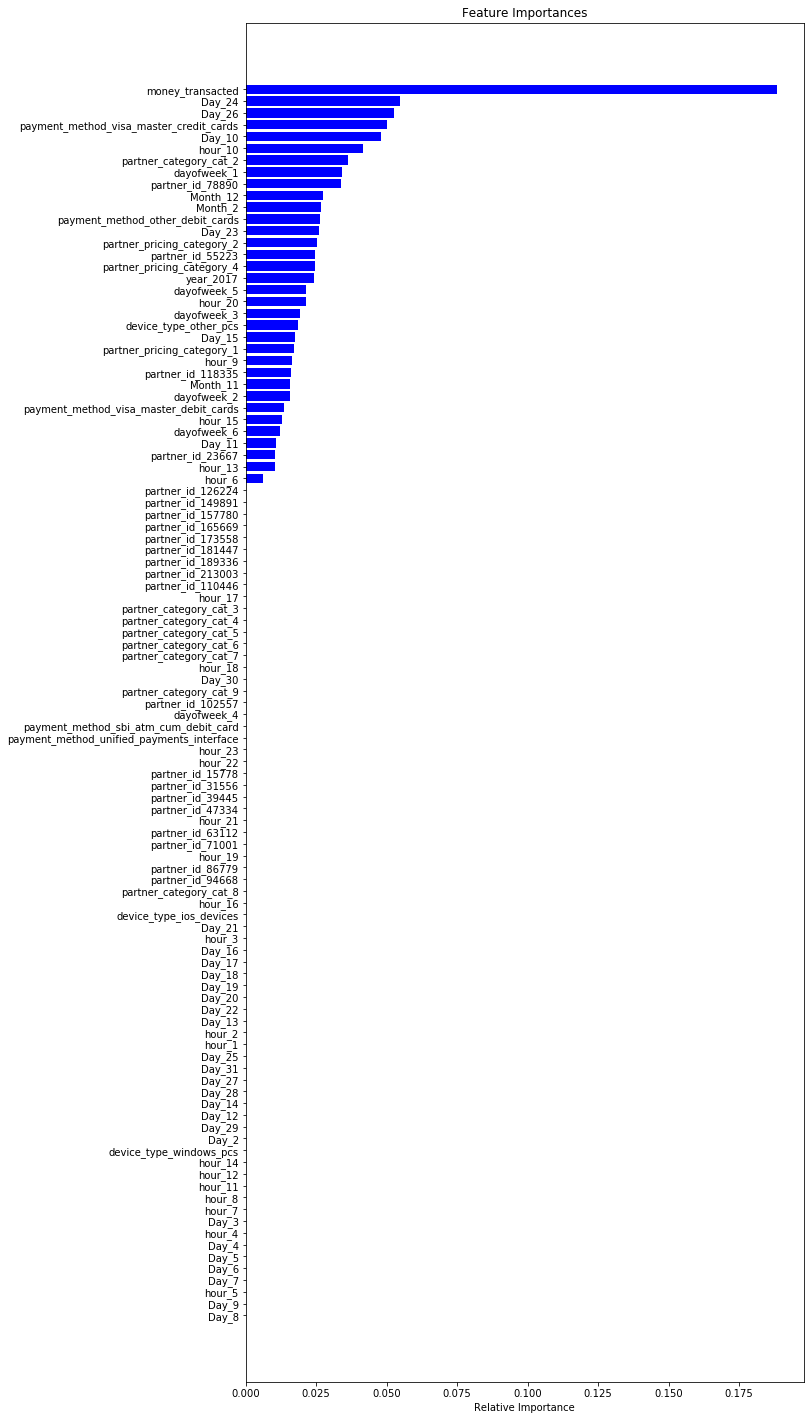

In [54]:
#important attributes
%matplotlib inline
features = X_train.columns
plt.figure(figsize=(10,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

* __money_transacted is an importanat feature for prediction__
* __there are only few days,months and payment methods where fraud has happened more so those features have high relative importance__

### Adaboost

In [55]:
# Create adaboost-decision tree classifer object
clf_adaboost =  AdaBoostClassifier(n_estimators = 600,
    learning_rate = 0.4)

clf_adaboost.fit(X_train, y_train)

y_pred_train = clf_adaboost.predict(X_train)
y_pred_valid = clf_adaboost.predict(X_valid)

In [56]:
classifcation_report_train_test(y_train,y_pred_train,y_valid,y_pred_valid)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000     51171
           1     0.9804    0.9709    0.9756       103

    accuracy                         0.9999     51274
   macro avg     0.9902    0.9854    0.9878     51274
weighted avg     0.9999    0.9999    0.9999     51274


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     25204
           1     0.7667    0.9020    0.8288        51

    accuracy                         0.9992     25255
   macro avg     0.8832    0.9507    0.9142     25255
weighted avg     0.9993    0.9992    0.9993     25255



In [57]:
scores = get_metrics(y_train,y_pred_train,y_valid,y_pred_valid,"AdaBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Valid_Accuracy,Valid_Recall,Valid_Precision,Valid_F1_Score
0,LogisticRegression,0.998284,0.998284,0.997908,0.997948,0.998258,0.998258,0.997978,0.998071
1,DecisionTrees,0.999590,0.999590,0.999591,0.999567,0.999525,0.999525,0.999509,0.999510
2,RandomForest,0.999961,0.999961,0.999961,0.999961,0.999168,0.999168,0.999125,0.999138
3,XGBoost,0.999863,0.999863,0.999862,0.999862,0.999485,0.999485,0.999551,0.999506
4,AdaBoost,0.999902,0.999902,0.999902,0.999902,0.999248,0.999248,0.999331,0.999278


### Pickling final best model for production 

In [58]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(XGB_model, open(filename, 'wb'))

### TEST_DATA

In [59]:
test_data=pd.read_csv('test_data.csv')

In [60]:
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [61]:
transaction=test_data['transaction_number']

In [62]:
test_data.shape

(19133, 10)

In [63]:
test_data.nunique()

transaction_number          19133
user_id                      2617
payment_method                  6
partner_id                     20
partner_category                8
country                         1
device_type                     4
money_transacted              695
transaction_initiation      19090
partner_pricing_category        4
dtype: int64

In [64]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [65]:
#extract day,month,year,time from timestamp column.So,convert it to datetime
test_data.transaction_initiation=pd.to_datetime(test_data.transaction_initiation)

In [66]:
test_data['year'] = test_data['transaction_initiation'].dt.year
test_data['Month'] = test_data['transaction_initiation'].dt.month
test_data['Day'] = test_data['transaction_initiation'].dt.day
test_data['hour'] = test_data['transaction_initiation'].dt.hour
test_data['dayofweek'] = test_data['transaction_initiation'].dt.dayofweek

In [67]:
test_data.drop('transaction_initiation',axis=1,inplace=True)
test_data.drop('country',axis=1,inplace=True)    #only one unique value
test_data.drop('transaction_number',axis=1,inplace=True) 
test_data.drop('user_id',axis=1,inplace=True) #id is of no use

In [68]:
test_data.head()

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,year,Month,Day,hour,dayofweek
0,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28,14,2
1,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14,17,2
2,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21,10,5
3,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16,13,0
4,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9,12,3


In [69]:
print(test_data.dtypes)
print(test_data.nunique())

payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
year                          int64
Month                         int64
Day                           int64
hour                          int64
dayofweek                     int64
dtype: object
payment_method                6
partner_id                   20
partner_category              8
device_type                   4
money_transacted            695
partner_pricing_category      4
year                          2
Month                         4
Day                          31
hour                         24
dayofweek                     7
dtype: int64


In [70]:
con_list=[cname for cname in test_data.columns if test_data[cname].nunique()<=31]
test_data[con_list]=test_data[con_list].astype('category')

In [71]:
test_data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
year                        category
Month                       category
Day                         category
hour                        category
dayofweek                   category
dtype: object

In [72]:
num_cols = test_data.select_dtypes(exclude='category').columns
print(len(num_cols))

cat_cols=test_data.select_dtypes(include='category').columns
print(len(cat_cols))

1
10


In [73]:
test_data_num = pd.DataFrame(scaler.transform(test_data[num_cols]), columns=num_cols)

In [74]:
test_data_cat=ohe.transform(test_data[cat_cols])
print(test_data_cat.shape)

(19133, 104)


In [75]:
test_data_cat = pd.DataFrame(test_data_cat.todense(), columns=columns_ohe)
print(test_data_cat.shape)

(19133, 104)


In [76]:
test_data=pd.concat([test_data_num,test_data_cat],axis=1)
print(test_data.shape)

(19133, 105)


### XGBoost

In [77]:
loaded_model = pickle.load(open(filename, 'rb'))

In [78]:
test_data_preds=loaded_model.predict(test_data)

In [79]:
final_submission=pd.concat([transaction,pd.DataFrame(test_data_preds,columns=['is_fraud'])],axis=1)

In [80]:
final_submission.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [81]:
final_submission.shape

(19133, 2)

In [82]:
final_submission.to_csv('final_submission.csv',index=False)